In [ ]:
# ---
# date: 2024-01-09
# image: ../images/icon.png
# ---

# New


In [219]:
import math
from functools import reduce
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(
    style="darkgrid",
    palette="Set2",
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": "k",
        "xtick.bottom": True,
        "ytick.left": True,
        "axes.linewidth": 1,
        "savefig.dpi": 300,
        "savefig.format": "pdf",
    },
)

In [43]:
def do_diff(length):
    numbers = np.random.randint(0, 9 + 1, length)

    while len(numbers) > 1:
        numbers = np.abs(np.diff(numbers))

    return numbers.item()


max_num = 100
num_samples = 10_000
xs = np.linspace(1, max_num, max_num, dtype=int)
res = np.array([[do_diff(x) for _ in range(num_samples)] for x in xs])
res

array([[3, 9, 2, ..., 0, 5, 0],
       [3, 6, 4, ..., 5, 0, 3],
       [1, 1, 4, ..., 2, 0, 2],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1]])

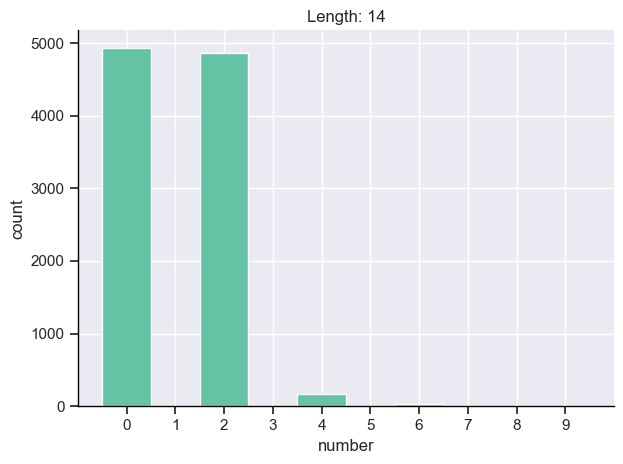

In [87]:
idx = 13

counts, bins = np.histogram(res[idx])
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

plt.title(f"Length: {idx + 1}")
plt.bar(center, counts, align="edge", width=width)
plt.xticks(ticks=bins[1:], labels=range(0, 10))
plt.xlabel("number")
plt.ylabel("count")
plt.tight_layout()

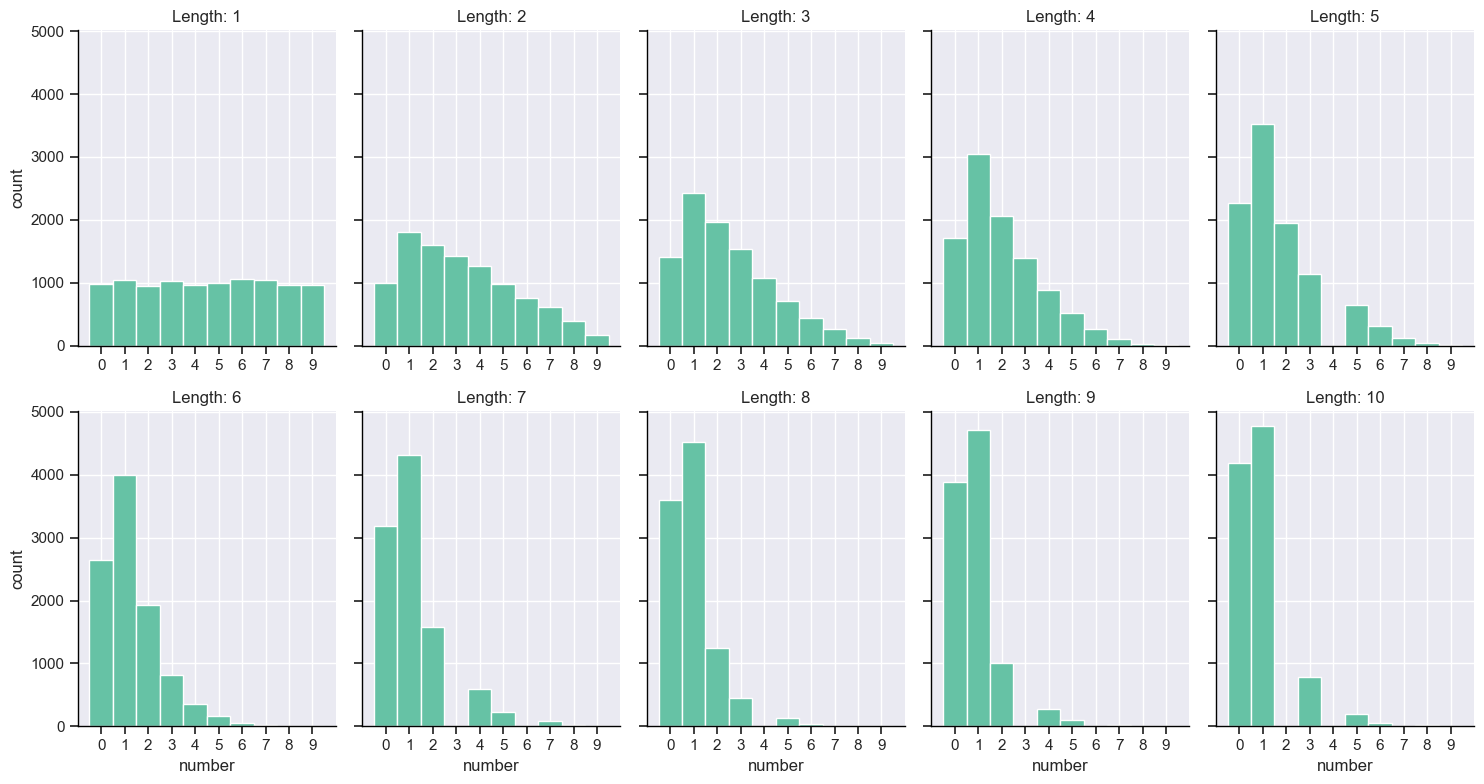

In [102]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), sharey=True)

for i in range(10):
    ax = axes[i // 5, i % 5]

    counts, bins = np.histogram(res[i])
    width = np.diff(bins)
    center = (bins[:-1] + bins[1:]) / 2

    ax.bar(center, counts, align="edge", width=width)
    ax.set_title(f"Length: {i + 1}")
    ax.set_xticks(ticks=bins[1:], labels=range(0, 10))

    if i // 5 == 1:
        ax.set_xlabel("number")

    if i % 5 == 0:
        ax.set_ylabel("count")


fig.tight_layout()

In [248]:
n = 5


def difference(row):
    for _ in range(row.size - 1):
        row = np.abs(np.diff(row))
    return row


arr = np.array([*product(*[range(9 + 1) for _ in range(n)])])
res = np.apply_along_axis(difference, 1, arr)
print(dict(zip(*np.unique(res, return_counts=True))))

{0: 22596, 1: 35420, 2: 20244, 3: 11248, 4: 5872, 5: 2900, 6: 1196, 7: 416, 8: 92, 9: 16}


{0: 1772, 1: 3008, 2: 2076, 3: 1376, 4: 856, 5: 496, 6: 260, 7: 112, 8: 36, 9: 8}


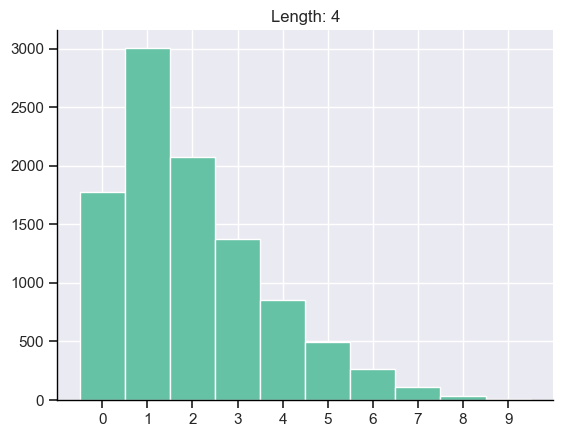

In [244]:
length = 4


def difference(row):
    for _ in range(row.size - 1):
        row = np.abs(np.diff(row))

    return row.item()


arr = np.array([*product(*[range(9 + 1) for _ in range(length)])])
res = np.apply_along_axis(difference, 1, arr)

counts, bins = np.histogram(res)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

plt.title(f"Length: {length}")
plt.bar(center, counts, align="edge", width=width)
plt.xticks(ticks=bins[1:], labels=range(0, 10))

# rAw nUmBeRs
print(dict(zip(*np.unique(res, return_counts=True))))

In [191]:
n = 3
np.apply_along_axis(lambda x: np.abs(np.diff(x)), 1, [*product(*[range(9 + 1) for _ in range(n)])])

array([[0, 0],
       [0, 1],
       [0, 2],
       ...,
       [0, 2],
       [0, 1],
       [0, 0]])

In [214]:
def f(x, y):
    return np.abs(np.diff(y))


reduce(f, [[9, 6, 5]], 0)

array([3, 1])

In [204]:
reduce(
    lambda arr, _: np.abs(np.diff(arr)),
    range(9),
    [*product(*[range(9 + 1) for _ in range(n)])],
)

array([], shape=(1000, 0), dtype=int64)

In [154]:
np.unique(res, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 18, 16, 14, 12, 10,  8,  6,  4,  2]))

In [144]:
np.unique(res, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1772, 3008, 2076, 1376,  856,  496,  260,  112,   36,    8]))

In [229]:
for a, b in data.items():
    print(a, b)

1 {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
2 {0: 10, 1: 18, 2: 16, 3: 14, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2}
3 {0: 140, 1: 244, 2: 192, 3: 148, 4: 108, 5: 76, 6: 48, 7: 28, 8: 12, 9: 4}
4 {0: 1772, 1: 3008, 2: 2076, 3: 1376, 4: 856, 5: 496, 6: 260, 7: 112, 8: 36, 9: 8}
5 {0: 22596, 1: 35420, 2: 20244, 3: 11248, 4: 5872, 5: 2900, 6: 1196, 7: 416, 8: 92, 9: 16}
6 {0: 271556, 1: 397520, 2: 184784, 3: 85432, 4: 38012, 5: 15596, 6: 5400, 7: 1420, 8: 248, 9: 32}


In [232]:
for n, row in enumerate(data.items(), start=1):
    print(n, row)
    for k, entry in row.items():
        pass

1 (1, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})


AttributeError: 'tuple' object has no attribute 'items'